In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Conv2DTranspose

In [0]:
inp = tf.keras.layers.Input(shape=(572,572,3))

c1 = Conv2D(64,3,strides=1,padding='valid',activation='relu')(inp)               #570x64
c12 = Conv2D(64,3,strides=1,padding='valid',activation='relu')(c1)               #568x64
up41 = tf.image.resize_with_crop_or_pad(c12,392,392)
m1 = MaxPool2D(pool_size=(2,2))(c12)                                            #284x64

c2 = Conv2D(128,3,strides=1,padding='valid',activation='relu')(m1)               #282x128
c22 = Conv2D(128,3,strides=1,padding='valid',activation='relu')(c2)              #280x128
up31 = tf.image.resize_with_crop_or_pad(c22,200,200)
m2 = MaxPool2D(pool_size=(2,2))(c22)                                            #140x128

c3 = Conv2D(256,3,strides=1,padding='valid',activation='relu')(m2)               #138x256
c32 = Conv2D(256,3,strides=1,padding='valid',activation='relu')(c3)              #136x256
up21 = tf.image.resize_with_crop_or_pad(c32,104,104)
m3 = MaxPool2D(pool_size=(2,2))(c32)                                            #68x256

c4 = Conv2D(512,3,strides=1,padding='valid',activation='relu')(m3)               #66x512
c42 = Conv2D(512,3,strides=1,padding='valid',activation='relu')(c4)              #64x512
up11 = tf.image.resize_with_crop_or_pad(c42,56,56)
m4 = MaxPool2D(pool_size=(2,2))(c42)                                            #32x512

c5 = Conv2D(1024,3,strides=1,padding='valid',activation='relu')(m4)              #30x1024
c52 = Conv2D(1024,3,strides=1,padding='valid',activation='relu')(c5)             #28x1024


up1 = Conv2DTranspose(512,3,strides=2,padding='same')(c52)                      #56x512
up1 = tf.keras.layers.concatenate([up11,up1])                                    #56x512
up12 = Conv2D(512,3,strides=1,padding='valid',activation='relu')(up1)            #54x512
up13 = Conv2D(512,3,strides=1,padding='valid',activation='relu')(up12)           #52x512

up2 = Conv2DTranspose(256,3,strides=2,padding='same')(up13)                     #104x256
up2 = tf.keras.layers.concatenate([up21,up2])                                    #104x256
up22 = Conv2D(256,3,strides=1,padding='valid',activation='relu')(up2)            #102x256          
up23 = Conv2D(256,3,strides=1,padding='valid',activation='relu')(up22)           #100x256

up3 = Conv2DTranspose(128,3,strides=2,padding='same')(up23)                     #200x128
up3 = tf.keras.layers.concatenate([up31,up3])                                    #200x128
up32 = Conv2D(128,3,strides=1,padding='valid',activation='relu')(up3)            #198x128
up33 = Conv2D(128,3,strides=1,padding='valid',activation='relu')(up32)           #196x128

up4 = Conv2DTranspose(64,3,strides=2,padding='same')(up33)                      #392x64
up4 = tf.keras.layers.concatenate([up41,up4])                                    #392x64
up42 = Conv2D(64,3,strides=1,padding='valid',activation='relu')(up4)             #390x64
up43 = Conv2D(64,3,strides=1,padding='valid',activation='relu')(up42)            #388x64

last = Conv2D(3,1,strides=1,padding='valid')(up43)                               #388x2

unet = tf.keras.Model(inputs=inp,outputs=last)










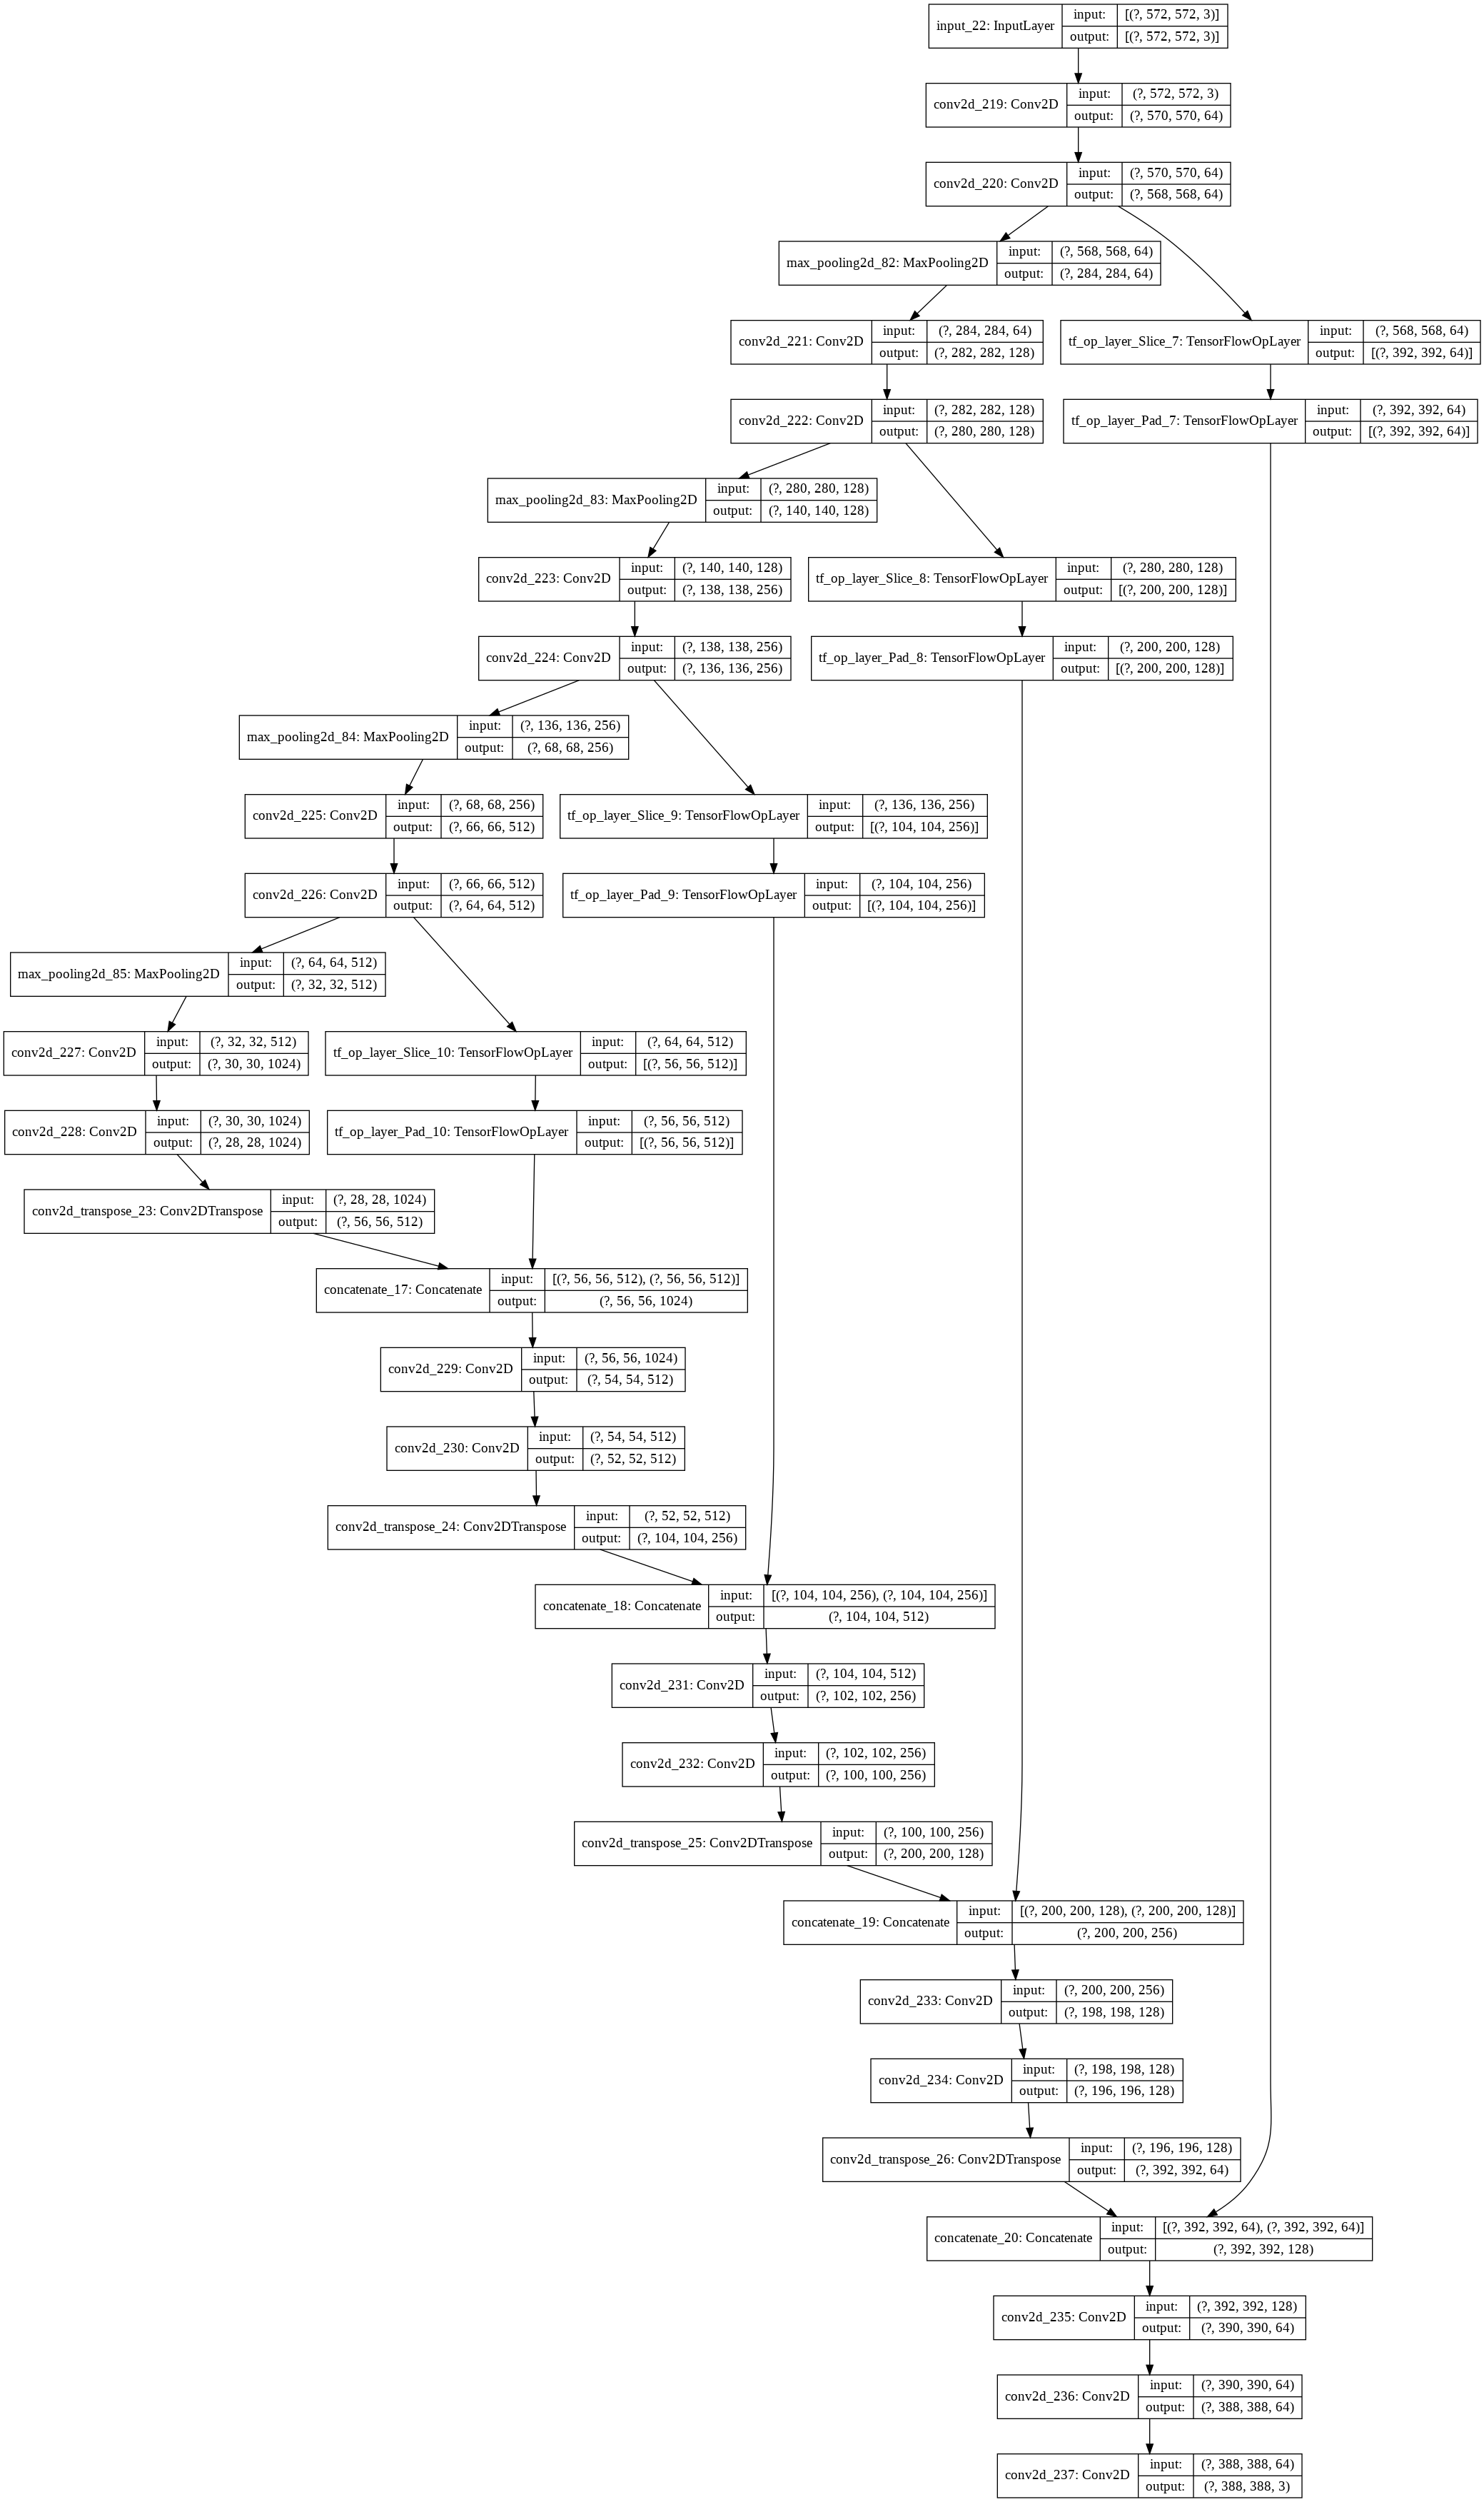

In [36]:
tf.keras.utils.plot_model(unet,show_shapes=True)

In [37]:
unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 572, 572, 3) 0                                            
__________________________________________________________________________________________________
conv2d_219 (Conv2D)             (None, 570, 570, 64) 1792        input_22[0][0]                   
__________________________________________________________________________________________________
conv2d_220 (Conv2D)             (None, 568, 568, 64) 36928       conv2d_219[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_82 (MaxPooling2D) (None, 284, 284, 64) 0           conv2d_220[0][0]                 
____________________________________________________________________________________________